## Stock analysis with pandas-datareader

### packages used
* pandas-datareader = get stock data
* mplfinance        = matplotlib finance plots
* datetime          = get datetime

In [1]:
import pandas_datareader.data as web

import mplfinance as mpf
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np

#from prophet import Prophet

import datetime 
from datetime import datetime as dt
import math

In [2]:
#define time line

start = datetime.datetime(2016, 1, 1)
startX = datetime.datetime(2021, 6, 1)
end = datetime.datetime.today()
endX = datetime.datetime.today()

#define source
source = "yahoo"

#define stocks
stocks = ["TMO", "GOOGL", "GOOG", "TSLA", "JNJ", "AAPL", "NVDA", "MSCI" "ROG.SW", "MRNA"]

In [3]:
#all = web.DataReader(stocks, source, start, end)
TMO = web.DataReader("TMO", source, start, end)
GOOGL = web.DataReader("GOOGL", source, start, end)     # Google
ALPHABET = web.DataReader("GOOG", source, start, end)     # Google alphabet
FB = web.DataReader("FB", source, start, end)    # Facebook
TSLA = web.DataReader("TSLA", source, start, end)       # 
JNJ = web.DataReader("JNJ", source, start, end)         # Jonson and Jonson
AAPL = web.DataReader("AAPL", source, start, end)       #APPLE
NVIDIA = web.DataReader("NVDA", source, start, end)       #NVIDIA
MSCI = web.DataReader("MSCI", source, start, end)       # WELT EFI
ROCHE = web.DataReader("ROG", source, start, end)    # ROCHE
GIVAU   = web.DataReader("GIVN.SW", source, start, end)    # Givaudan
MODERNA = web.DataReader("MRNA", source, start, end)    # Moderna
CODEXIS = web.DataReader("CDXS", source, start, end)    # Codexis
NANOPORE = web.DataReader("ONT", source, start, end)    # Oxford nanopore
TWIST = web.DataReader("TWST", source, start, end)    # TWIST BIOSCIENCE
ZYM = web.DataReader("ZY", source, start, end)    # TWIST BIOSCIENCE
IMSIF   = web.DataReader("IMSIF", source, start, end)    # ISHARES GLOBAL CLEAN ENERGY UCITS ETF
NOVO   = web.DataReader("NVZMF", source, start, end)    # ISHARES GLOBAL CLEAN ENERGY UCITS ETF


In [18]:
CODEXIS = web.DataReader("CDXS", source, start, end)    # Codexis


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,4.260000,4.130000,4.150000,4.220000,70100,4.220000
2016-01-05,4.240000,4.150000,4.230000,4.230000,151200,4.230000
2016-01-06,4.280000,4.180000,4.220000,4.230000,76800,4.230000
2016-01-07,4.230000,4.060000,4.180000,4.130000,56300,4.130000
2016-01-08,4.200000,4.000000,4.190000,4.170000,75300,4.170000
...,...,...,...,...,...,...
2022-03-29,21.629999,20.129999,20.129999,21.180000,447500,21.180000
2022-03-30,21.270000,20.309999,20.860001,20.480000,385600,20.480000
2022-03-31,21.340000,20.549999,21.040001,20.620001,473500,20.620001


Text(0.5, 1.0, 'Opening stock prices')

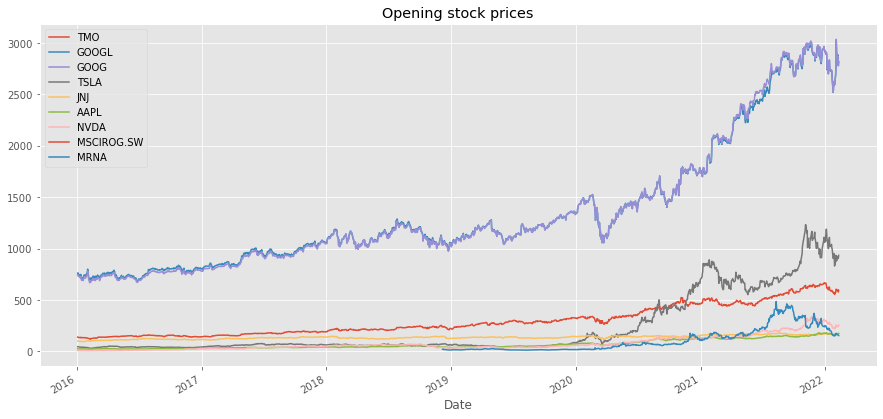

In [4]:
#multiple plots

for stock in stocks:
    all["Open"][stock].plot(label=stock, figsize=(15,7))
plt.legend()
plt.title("Opening stock prices")

# ACHTUNG NICHT IM VERHÄLTNISS  

## Single Stock with moving averages

* MA50 = Moving average of 50 days

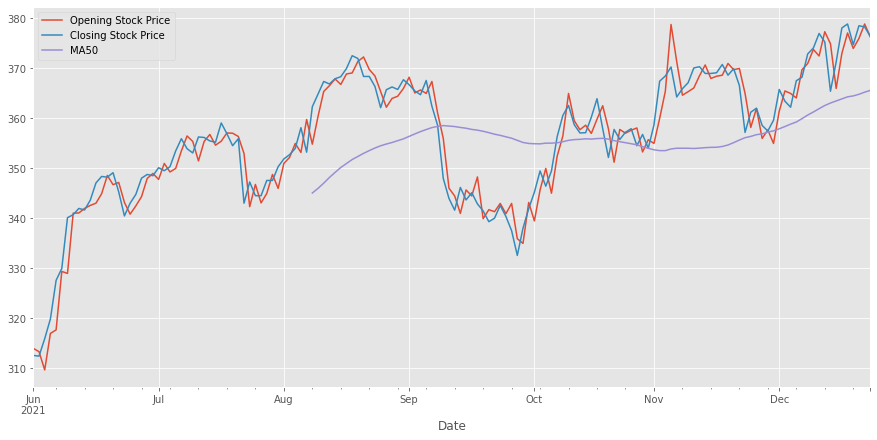

In [9]:
ROCHE = web.DataReader("ROG.SW", source, startX, endX)


ROCHE["MA50"] = ROCHE["Open"].rolling(50).mean()

ROCHE["Open"].plot(label="Opening Stock Price", figsize=(15,7))
ROCHE["Close"].plot(label="Closing Stock Price", figsize=(15,7))
ROCHE["MA50"].plot(label="MA50", figsize=(15,7))

plt.legend()

### Function for visualizing moving averages

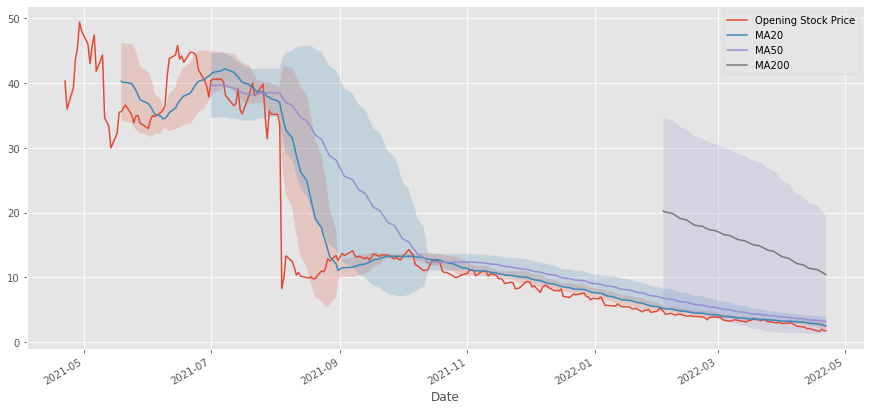

In [4]:
def stocker(stockX, *maxx):

    if not isinstance(maxx, list):
        maxx = [maxx]

    maxx = list(*maxx)


    
    fig, ax = plt.subplots( figsize=(15,7))

    stockX["Open"].plot(label="Opening Stock Price", figsize=(15,7))

    for i in maxx:

        stockX["MA" + str(i)] = stockX["Open"].rolling(i).mean()
        stockX["MA" + str(i) + " stdUp"] = stockX["Open"].rolling(i).mean() + stockX["Open"].rolling(i).std()
        stockX["MA" + str(i) + " stdDo"] = stockX["Open"].rolling(i).mean() - stockX["Open"].rolling(i).std()

        ax.plot(
            stockX["MA" + str(i)],
            label="MA" + str(i)
        )
        ax.fill_between(stockX["MA" + str(i)].index, 
                                stockX["MA" + str(i) + " stdDo"], 
                                stockX["MA" + str(i) + " stdUp"], 
                                alpha=0.2)
        
        

       

    plt.legend()


stocker(web.DataReader("ZY", source, start, end), 
                            20, 50, 200)

## Candlestick plot with the mpfinance package

* Moving average gives insight into markt movement
* only use 20, 50 and 200

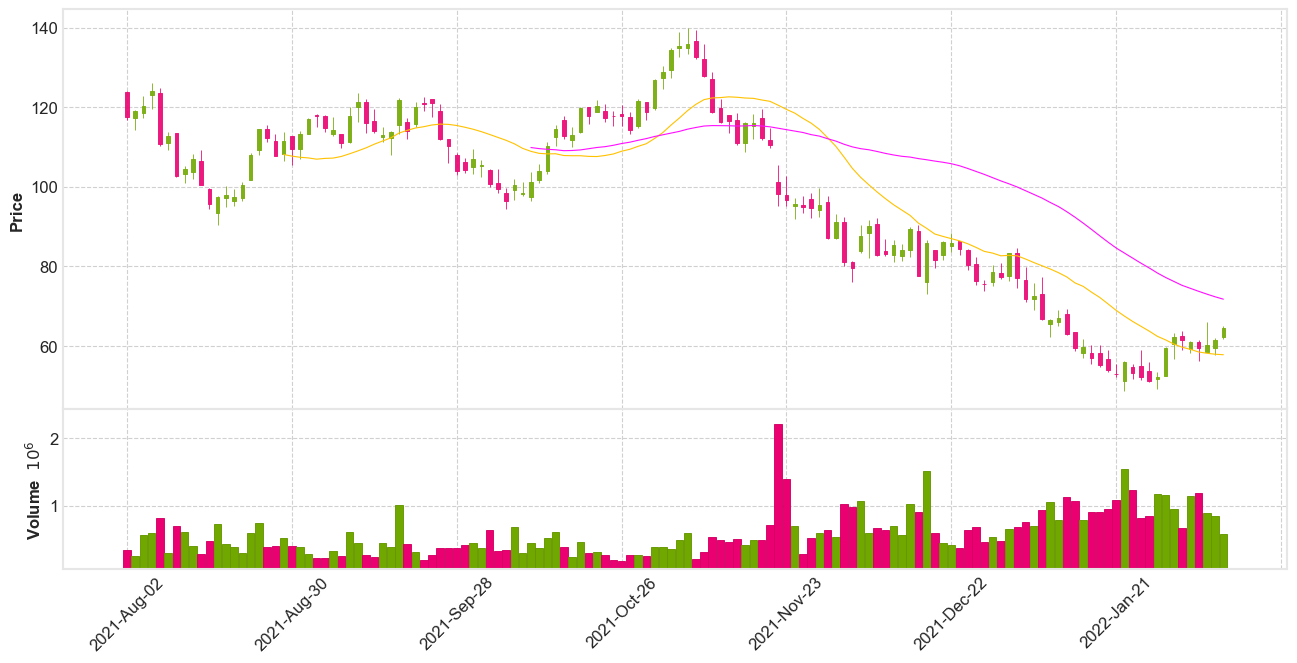

In [6]:
startX = datetime.datetime(2021, 8, 1)
endX = datetime.datetime.today()
STOCK = web.DataReader("TWST", source, startX, endX)
mpf.plot(STOCK, type='candle', mav=(20, 50, 200), style="binance", figsize=(17,8), volume=True) #set moving averages range with mav=



## Volatility distribution by the daily percentage change

## $ r_{r} = \frac{Price_{t}}{Price_{t-1}} -1 $

## with price(t) = stock price at day t and price(t-1) stock price the day before


In [27]:
TSLA["returns"] = TSLA["Open"] / TSLA["Open"].shift(1) -1
JNJ["returns"] = JNJ["Open"] / JNJ["Open"].shift(1) -1
AAPL["returns"] = AAPL["Open"] / AAPL["Open"].shift(1) -1
TMO["returns"] = TMO["Open"] / TMO["Open"].shift(1) -1

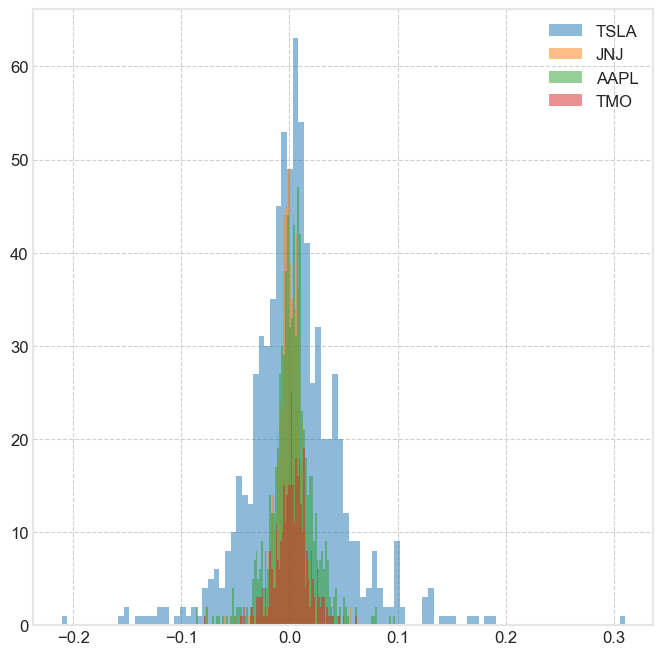

In [28]:
def priceFluk(stockX, bini = 50):

    for stock, lab in zip(stockX, ["TSLA", "JNJ", "AAPL", "TMO"]):
        stock["returns"].hist(bins=100, label=str(lab), alpha = 0.5, figsize=(8,8))
    plt.legend()
    plt.show()

priceFluk([TSLA, JNJ, AAPL, TMO])

In [26]:
TMO

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-01,351.140015,347.600006,348.000000,349.329987,845700.0,348.062286
2020-06-02,350.799988,346.679993,349.320007,350.089996,1166500.0,348.819550
2020-06-03,352.589996,345.390015,351.420013,347.190002,1209700.0,345.930145
2020-06-04,349.790009,343.920013,343.920013,348.149994,1763500.0,346.886597
2020-06-05,356.420013,345.570007,348.149994,354.200012,1712100.0,352.914642
...,...,...,...,...,...,...
2021-11-24,633.679993,623.900024,633.250000,633.000000,1283200.0,632.745239
2021-11-26,666.650024,636.900024,652.710022,638.739990,1677700.0,638.482910
2021-11-29,654.650024,638.280029,640.000000,648.770020,1869900.0,648.508911
